<a href="https://colab.research.google.com/github/ramnarh1777/team24/blob/main/19BCD7163_ML_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ANALYTICS PROJECT**

**PROJECT TITLE : HUMAN ACTIVITY RECOGNITION USING SMARTPHONES**

**INTRODUCTION :**

Our project is a Human Action Recognition using smartphone. This is mainly built using Python and Machine Learning. This project revolves around gathering the data of human activities. And with that data as a base, we will train the dataset, so that we will be able to predict the human activities. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

**1) IMPORTING THE DATASETS**

I have already downloaded the datasets and saved them in drive .One dataset is for training and the other is for testing.

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/ML_Mini_Project/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/ML_Mini_Project/test.csv")

Overlook over train dataset

In [ ]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

Dimensions of both train and test dataset

In [ ]:
df_train.shape

(7352, 563)

In [ ]:
df_test.shape

(2947, 563)

Count of each activity

In [ ]:
df_train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

Note: In this project the following are the six human activities that we were going to predict

In [ ]:
df_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

**2. Dataset Cleaning**

2.1 Oultiers

In [ ]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.

There will be no chance of outliers since all the values are in between the range of -1 to 1

2.2 Checking for NaN/null values and Duplicates

In [ ]:
print("Total Duplicates Train: {} \n".format(sum(df_train.duplicated())))
print("Total Duplicates in Test: {} \n".format(sum(df_test.duplicated())))

Total Duplicates Train: 0 

Total Duplicates in Test: 0 



There are no duplicate values in the dataset

2.3 Check for imbalanced dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

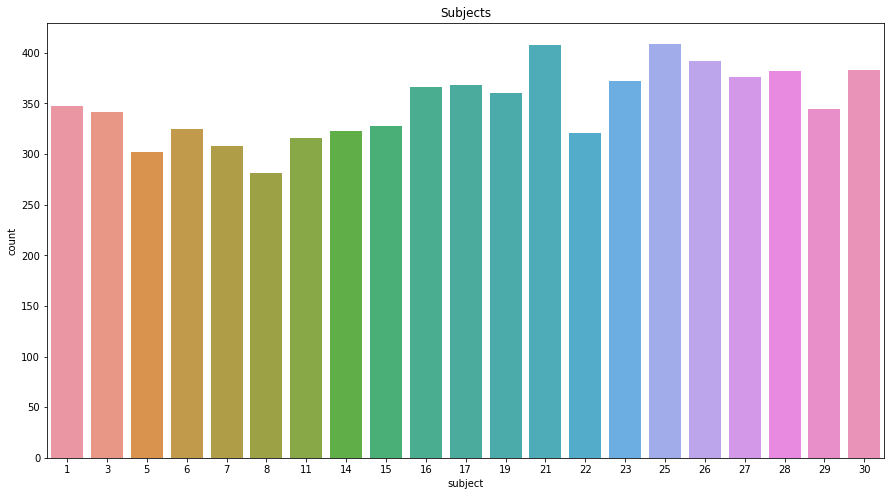

In [ ]:
plt.figure(figsize = (15,8))
plt.title('Subjects')
sns.countplot(x = 'subject', data = df_train);

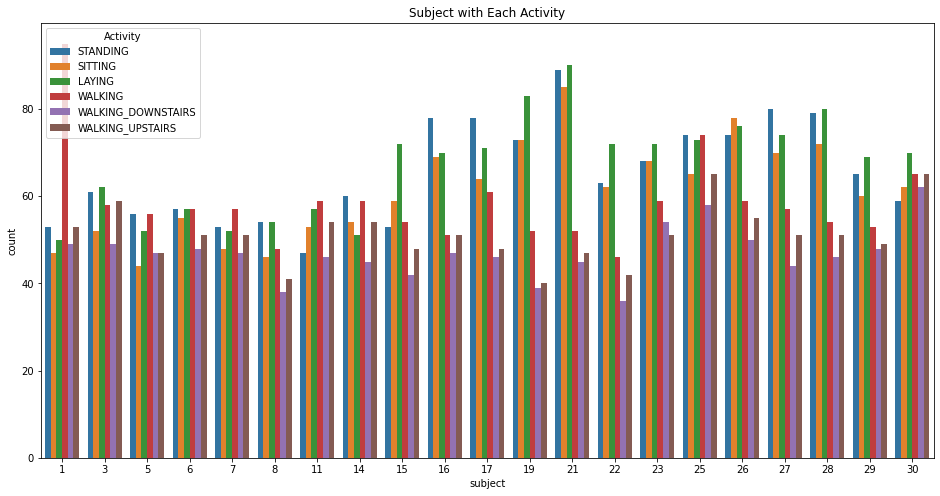

In [ ]:
plt.figure(figsize = (16,8))
plt.title("Subject with Each Activity")
sns.countplot(hue = 'Activity', x='subject',data = df_train);
plt.show()

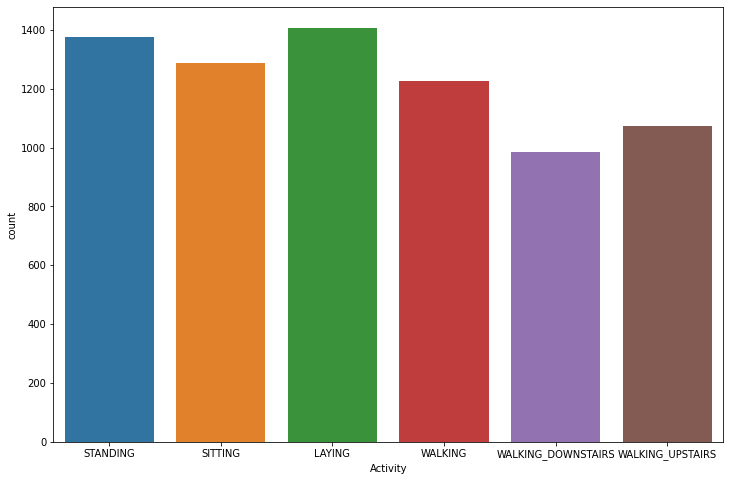

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Activity', data = df_train);

We can clearly see, each subjects has almost equal or less amount of data. There is no any huge amount of gap between them.

2.4 Correcting some feature names

In [ ]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In this data we can see, some () 'bracket' between the feature's name. We will remove all these brackets quickly. 

In [ ]:
columns = df_train.columns
## Removing ()
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

In [ ]:
df_train.columns = columns
df_test.columns = columns

In [ ]:
df_train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

**3. Analysing Data **

Static and Dynamic Activites

**-> Static activities** are (sit, stand, lie and down) thus there is no any motion of an object.

**->Dynamic activities** (Walking, WalkingUpStairs, WalkingDownStairs) motion info will be significant

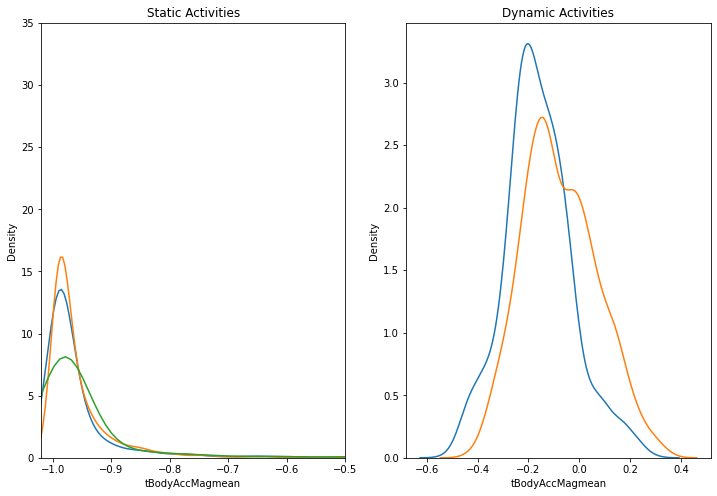

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Static Activities")
sns.distplot(df_train[df_train["Activity"]=="SITTING"]['tBodyAccMagmean'], hist = False, label = 'Sitting');
sns.distplot(df_train[df_train["Activity"]=="STANDING"]['tBodyAccMagmean'], hist = False, label = 'Standing');
sns.distplot(df_train[df_train["Activity"]=="LAYING"]['tBodyAccMagmean'], hist = False, label = 'Laying');
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities")
sns.distplot(df_train[df_train["Activity"]=="WALKING"]["tBodyAccMagmean"], hist = False, label ="Sitting");
sns.distplot(df_train[df_train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'], hist = False, label = 'Laying');

We will use box plot to visulaize

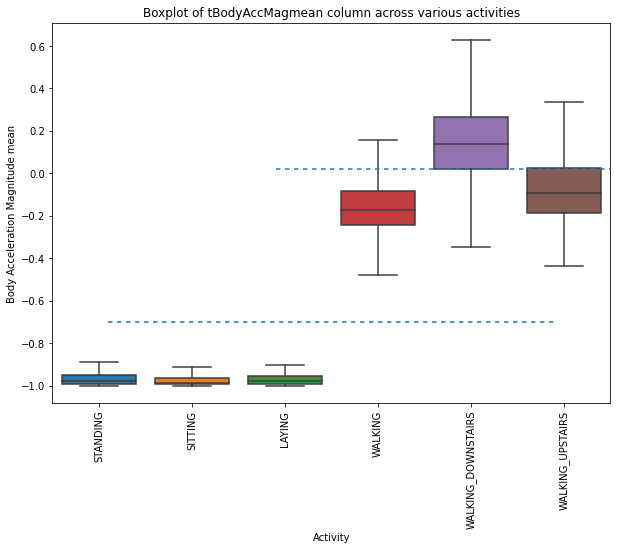

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y ='tBodyAccMagmean', data = df_train, showfliers = False);
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMagmean column across various activities')
plt.axhline(y =- 0.7, xmin = 0.1, xmax = 0.9, dashes = (3,3))
plt.axhline(y = 0.020, xmin = 0.4, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

**Observation from this graph:**

1)    if(tBodyAccMagmean <= -0.8):
      Activity = "static"

  if(tBodyAccMagmean >= -0.6):
      Activity = "dynamic"

2)if (tBodyAccMagmean > 0.02):
    Activity = "WALKING_DOWNSTARIS"
    
else:
    Activity = "others

3.2 Analysing Angle between X-axis and gravityMean feature

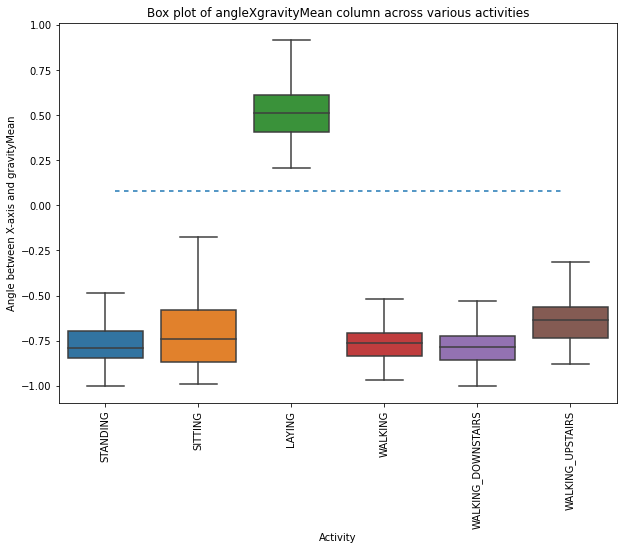

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y = 'angleXgravityMean', data = df_train, showfliers = False)
plt.axhline(y = 0.08, xmin = 0.1 , xmax = 0.9, dashes = (3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title("Box plot of angleXgravityMean column across various activities")
plt.xticks(rotation = 90)
plt.show()

**Observation:**

If (angleXgravityMean > 0.01) then Activity is Laying

**4 Visualizing data using t-SNE**

In [ ]:
from sklearn.manifold import TSNE
X_for_tsne = df_train.drop(['subject','Activity'], axis = 1)
tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = 50, n_iter = 1000).fit_transform(X_for_tsne)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.530s...
[t-SNE] Computed neighbors for 7352 samples in 45.353s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.123062
[t-SNE] KL divergence after 1000 iterations: 1.282848


Using scatter plot to display the divided data

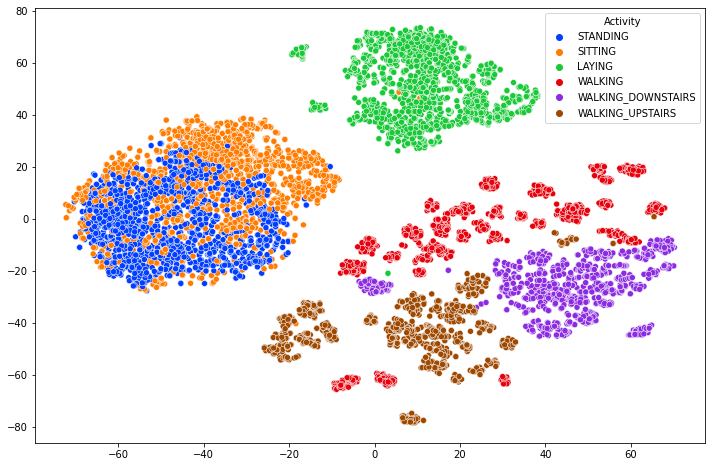

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = tsne[:,0], y = tsne[:,1], hue = df_train["Activity"], palette = "bright")

Observations:

Laying is totally different position

Walking, Walking_downstaris, Walking_upstairs are some kind of similar so they are clustered together

Standing and Sitting are also some kind of same position

**4. Data Preprocessing**

4.1 Splitting training and testing

In [ ]:
y_train = df_train.Activity
X_train = df_train.drop(['subject','Activity'], axis = 1)
y_test = df_test.Activity
X_test = df_test.drop(['subject','Activity'], axis = 1)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)

Training data size: (7352, 561)
Test data size: (2947, 561)


In [ ]:
model_score = pd.DataFrame(columns = ("Model","Score"))

**5. Testing with 4 Models**

**->** Logistic Regression

**->** Linear SVM

**->** Decision Tree

**->** Random Forest


**5.1 Logistic regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
parameters = {'C':np.arange(10,61,10),'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 5, random_state = 42)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

**Accuracy and estimator of Logistic regression**

In [ ]:
lr_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Logisitc Regression:", lr_accuracy) 
print() 
print(confusion_matrix(y_test,y_pred))

Accuracy using Logisitc Regression: 0.9592806243637597

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.98      0.97      0.97       420
  WALKING_UPSTAIRS       0.97      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
lr_classifier_rs.best_estimator_

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion matrix for Logistic regression

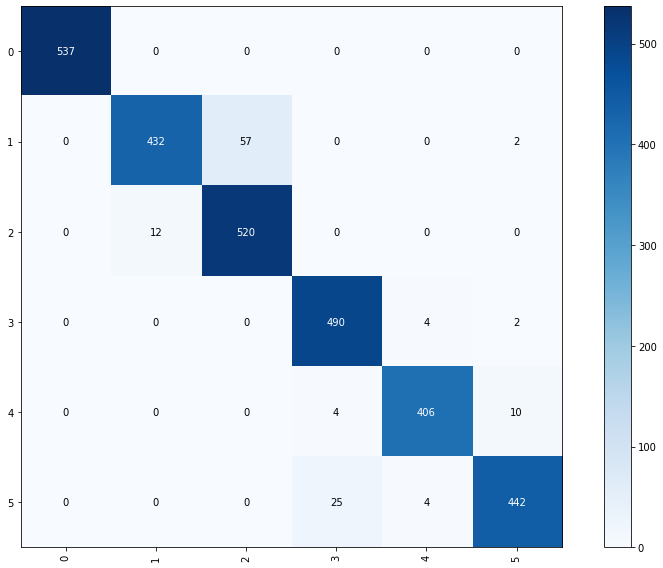

In [ ]:
def plot_confusion_matrix(cm, lables):
    fig, ax = plt.subplots(figsize = (12,8))
    im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]))
    yticks = np.arange(cm.shape[0])
    ylabel = 'True label'
    xlabel = 'Predicted label'
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i,j]), ha = "center", va = "center", color = "white" if cm[i,j]> thresh else "black")
            fig.tight_layout()
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["LogisRegression"],'Score':[lr_accuracy]}))

Best random search attributes


In [ ]:
def get_best_randomsearch_results(model):
    print("Best estimator:", model.best_estimator_)
    print("Best set of parameters:", model.best_params_)
    print("Best score:", model.best_score_)

get_best_randomsearch_results(lr_classifier_rs)

Best estimator: LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best set of parameters: {'penalty': 'l2', 'C': 50}
Best score: 0.9329506051230826


**4.2 Linear SVM model**

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
parameters = {'C': np.arange(1,12,2)}
lr_svm = LinearSVC(tol = 0.00005)
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions = parameters, random_state = 42)
lr_svm_rs.fit(X_train, y_train)
y_pred = lr_svm_rs.predict(X_test)

**Accuracy and estimator of Linear SVM**

In [ ]:
lr_svm_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Linear SVM:", lr_svm_accuracy) 
print() 
print(confusion_matrix(y_test,y_pred))

Accuracy using Linear SVM: 0.9650492025788938

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.92       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.96      0.97      2947
      weighted avg       0.97      0.97      0.96      2947



Confusion Matrix for Linear SVM

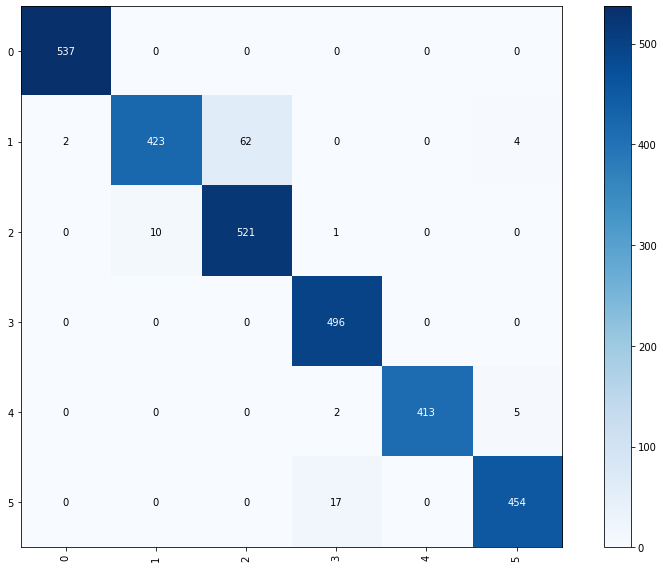

In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["LinearSVM"],'Score':[lr_svm_accuracy]}))
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

Getting best random search attributes


In [ ]:
get_best_randomsearch_results(lr_svm_rs)

Best estimator: LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)
Best set of parameters: {'C': 1}
Best score: 0.941655960820766


**5.3 Decision tree model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

Accuracy of Decision tree Model

In [ ]:
dt_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Decision tree:", dt_accuracy) 
print() 
print(confusion_matrix(y_test,y_pred))

Accuracy using Decision tree: 0.8690193417034272

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.75      0.81       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.83      0.95      0.88       496
WALKING_DOWNSTAIRS       0.88      0.82      0.85       420
  WALKING_UPSTAIRS       0.85      0.77      0.81       471

          accuracy                           0.87      2947
         macro avg       0.87      0.86      0.87      2947
      weighted avg       0.87      0.87      0.87      2947



In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["DecisionTrees"],'Score':[dt_accuracy]}))

Confusion Matrix of Decision Tree Model

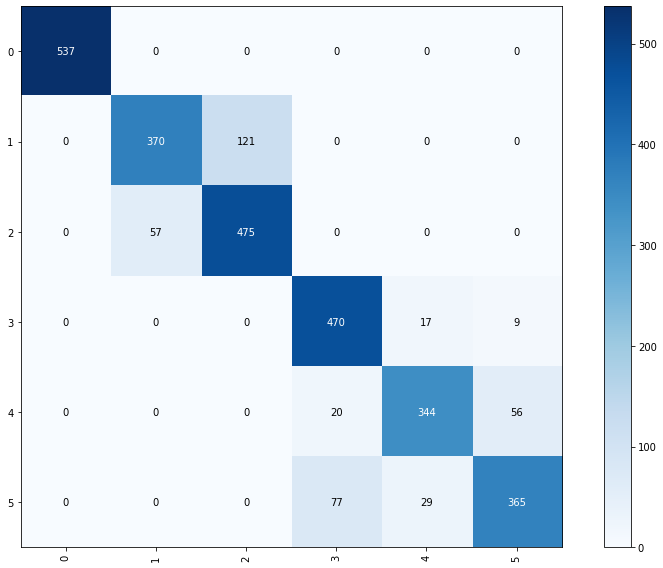

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

Getting best estimators


In [ ]:
get_best_randomsearch_results(dt_classifier_rs)

Best estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best set of parameters: {'max_depth': 8}
Best score: 0.8491660539130675


**5.4 Random Forest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

Accuracy of Random Forest Model

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Random Forest:", rf_accuracy) 
print() 
print(confusion_matrix(y_test,y_pred))

Accuracy using Random Forest: 0.9246691550729556

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.88      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.89      0.96      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947



In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["RandomForest"],'Score':[rf_accuracy]}))

Confusion Matrix of Random Forest Model

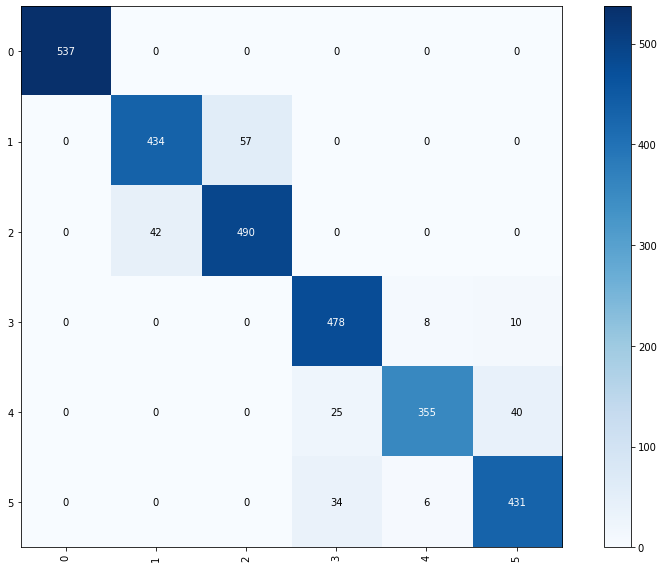

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

**Comparing the Accuracies**

In [ ]:
model_score.head()

,Model,Score
0,LogisRegression,0.959281
0,LinearSVM,0.965049
0,DecisionTrees,0.869019
0,RandomForest,0.924669


**Conclusion :**

After training the data and testing the data we get the above given accuracies for testing the data with 4 different machine learning models.Amongest all o them LinearSVM model gets the highest accuracy i.e; 0.965728.So, for this given data that is collected from accelerometers  Linear SVM is more suitable.